In [68]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from scipy.ndimage import binary_opening, morphological_gradient, morphological_laplace
from scipy.ndimage.filters import *

In [74]:
src = rasterio.open('/home/cparr/surfaces/depth_ddems/clpx/clpx_2017_dDEM_035m_offset.tif')
depth = src.read(1)[9000:12000,5000:11500]
mu = np.nanmean(depth)
sigma = np.nanstd(depth)
threshold = 1 * sigma + mu
threshold

0.78581257164478302

/home/cparr/miniconda3/envs/raster_IO_pd/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


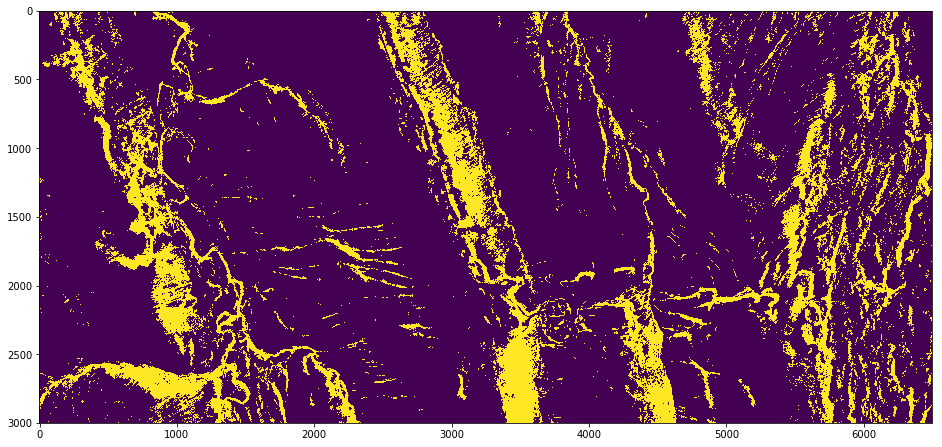

In [75]:
drift_mask = depth > threshold
plt.figure(figsize=(16,10))
plt.imshow(drift_mask)

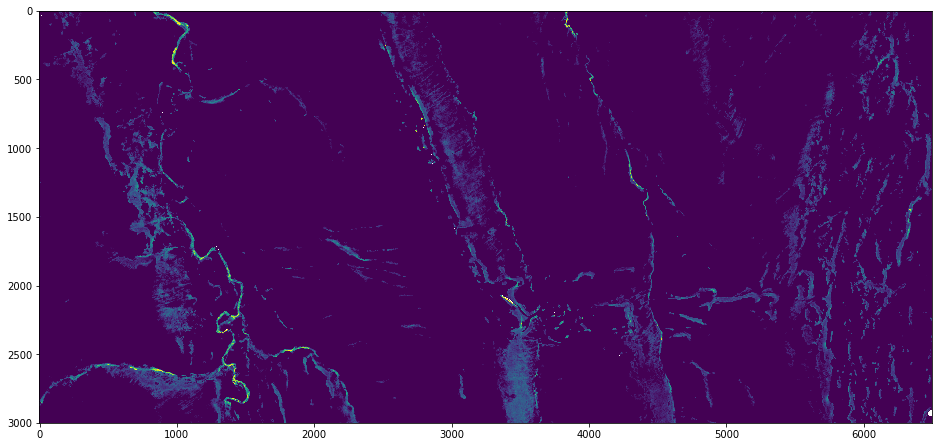

In [80]:
smooth = median_filter(drift_mask,17)
plt.figure(figsize=(16,10))
plt.imshow(smooth*depth, vmin=threshold, vmax=2)

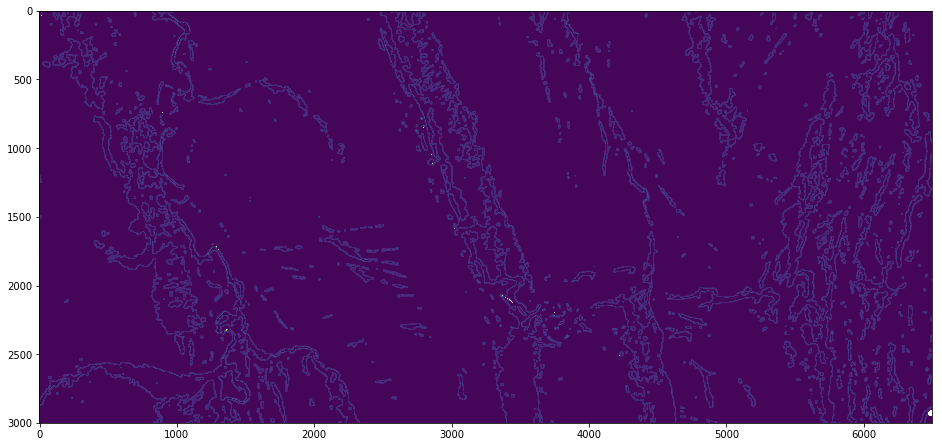

In [78]:
plt.figure(figsize=(16,10))

plt.imshow(morphological_gradient(smooth,11)*depth)

plt.plot(depth[2000])

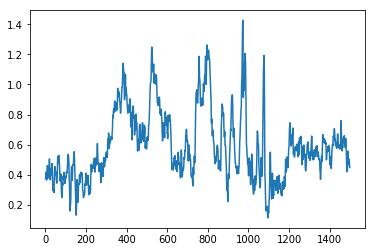

In [82]:
plt.plot(depth[2000][500:2000])